### Hierarchical Clustering

#### Import Libraries & DataSets

In [1]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np  

import warnings
warnings.filterwarnings('ignore')

In [2]:
customer_data = pd.read_csv('shopping_data.csv')  
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
customer_data.shape

(200, 5)

In [4]:
#Filtering the columns
data = customer_data.iloc[:, 3:5].values

In [5]:
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Run Dendrogram based hierarchial clustering

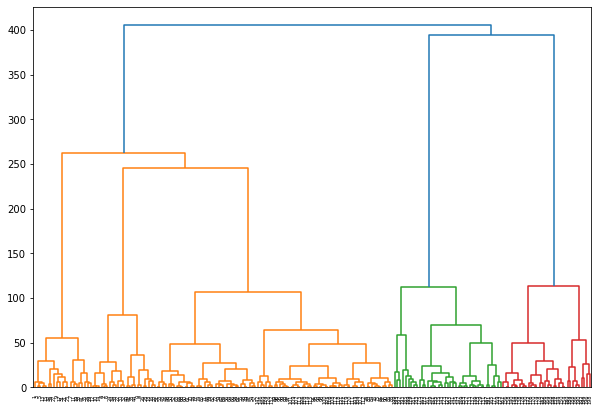

In [9]:
import scipy.cluster.hierarchy as hierarchy
plt.figure(figsize=(10, 7))
dend = hierarchy.dendrogram(hierarchy.linkage(data, method = 'ward'))

## Predict the clusters for the observations 

In [14]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5)  #n_clusters = k value = 5
cluster.fit_predict(data) #unsupervised model: fit and predict apply together

#cluster.fit(data)
#cluster.predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

## Plot the clusters

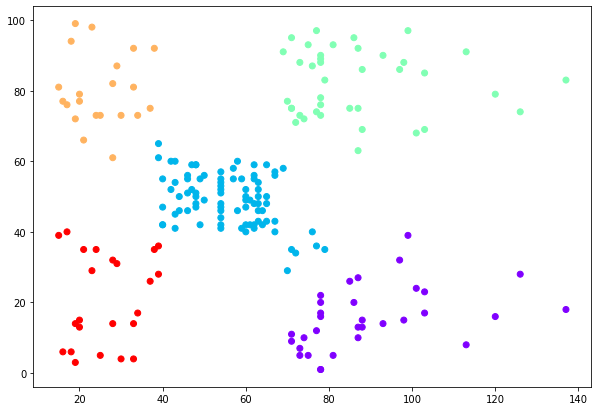

In [15]:
#Plot all the points of Annual income and spending score and then shade them by the predictions obtained for them

plt.figure(figsize=(10, 7))  
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')  


# K-Means Clustering

## Import Libraries and Dataset

In [16]:
#importing the dataset
dataset = pd.read_csv('Cust_Spend_Data.csv')
dataset

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3
5,6,F,4000,3,0,1,8
6,7,G,2500,5,0,11,2
7,8,H,2500,3,0,1,1
8,9,I,2000,2,0,2,2
9,10,J,1000,4,0,1,7


In [17]:
dataset1 = dataset.iloc[:,1:]
dataset1.head()

,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,A,10000,2,1,1,0
1,B,7000,3,0,10,9
2,C,7000,7,1,3,4
3,D,6500,5,1,1,4
4,E,6000,6,0,12,3


## Feature Scaling

In [19]:
data = dataset1.iloc[:, 1:6].values  #standardize the data to normal distribution
from sklearn.preprocessing  import StandardScaler
ss = StandardScaler()
dataset1_standardized = ss.fit_transform(data)
dataset1_standardized = pd.DataFrame(dataset1_standardized)
dataset1_standardized

,0,1,2,3,4
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033
5,-0.311364,-0.620174,-0.654654,-0.741433,1.380131
6,-0.860829,0.620174,-0.654654,1.505333,-0.690066
7,-0.860829,-0.620174,-0.654654,-0.741433,-1.035098
8,-1.043984,-1.240347,-0.654654,-0.516756,-0.690066
9,-1.410294,0.000000,-0.654654,-0.741433,1.035098


## WSS Plot or Elbow Curve for Optimal cluster identification

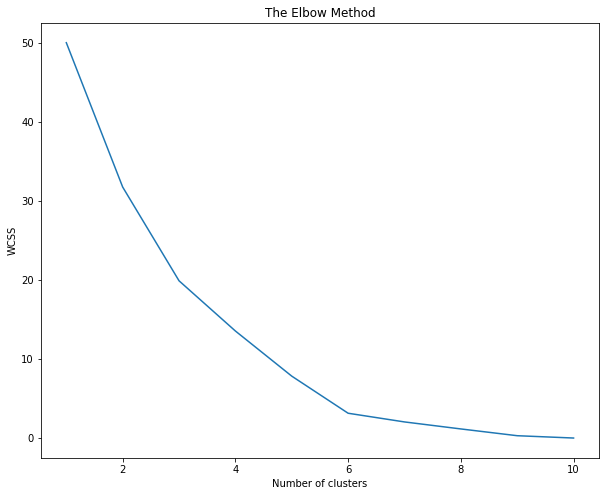

In [20]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset1_standardized)
    wcss.append(kmeans.inertia_)     #kmeans.inertia_  is the method to calculate Within Cluster Sum of Squares (WSS or WCSS)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
wcss

[49.99999999999999,
 31.74187662170361,
 19.885638113149096,
 13.534706618462632,
 7.826741813986412,
 3.1354058072109265,
 2.0364626724072825,
 1.1494998966150178,
 0.2938441747231336,
 0.0]

## K-Means Clustering & Cluster Information

In [22]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, random_state = 42)
y_kmeans = kmeans.fit_predict(dataset1_standardized)   #cluster numbers: 0,1,2
y_kmeans

array([2, 0, 2, 2, 0, 1, 0, 1, 1, 1], dtype=int32)

In [23]:
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans)
# Adding cluster to the Dataset1
dataset1['cluster'] = cluster
dataset1

,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,cluster
0,A,10000,2,1,1,0,2
1,B,7000,3,0,10,9,0
2,C,7000,7,1,3,4,2
3,D,6500,5,1,1,4,2
4,E,6000,6,0,12,3,0
5,F,4000,3,0,1,8,1
6,G,2500,5,0,11,2,0
7,H,2500,3,0,1,1,1
8,I,2000,2,0,2,2,1
9,J,1000,4,0,1,7,1


In [24]:
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(dataset1.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
cluster,,,,,
0,5166.7,4.7,0.0,11.0,4.7
1,2375.0,3.0,0.0,1.2,4.5
2,7833.3,4.7,1.0,1.7,2.7


In [25]:
#Observing the first cluster
cluster_0 = dataset1[dataset1['cluster'] == 0]
cluster_0

,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,cluster
1,B,7000,3,0,10,9,0
4,E,6000,6,0,12,3,0
6,G,2500,5,0,11,2,0


In [26]:
cluster_0.shape

(3, 7)

In [27]:
#Observing the second cluster
cluster_1 = dataset1[dataset1['cluster'] == 1]
cluster_1

,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,cluster
5,F,4000,3,0,1,8,1
7,H,2500,3,0,1,1,1
8,I,2000,2,0,2,2,1
9,J,1000,4,0,1,7,1


In [ ]:
cluster_1.shape

In [28]:
#Observing the third cluster
cluster_2 = dataset1[dataset1['cluster'] == 2]
cluster_2

,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,cluster
0,A,10000,2,1,1,0,2
2,C,7000,7,1,3,4,2
3,D,6500,5,1,1,4,2


In [29]:
cluster_2.shape

(3, 7)

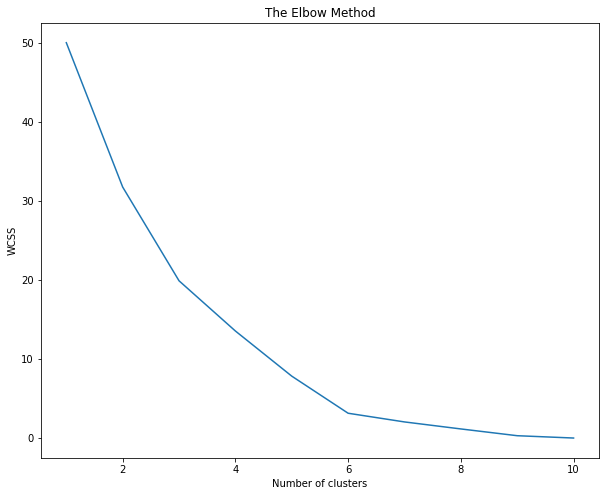

In [30]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans_1 = KMeans(n_clusters = i, random_state = 42)
    kmeans_1.fit(dataset1_standardized)
    wcss.append(kmeans_1.inertia_)     #kmeans.inertia_  is the method to calculate Within Cluster Sum of Squares (WSS or WCSS)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()